### Carregando Pacotes

In [1]:
import scipy
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

## Definindo os Ativos Financeiros

In [2]:
df = yf.download(['NVDA',
                  'AMZN',
                  'GOOGL',
                  'AMD',
                  'MSFT',
                  'AAPL',
                  'TSLA',
                  'SONY',
                  'SPOT',
                  'NFLX'],
                 start = '2024-01-01', end = '2024-03-31')

[*********************100%%**********************]  10 of 10 completed


In [3]:
df = df['Close']

In [4]:
df.shape

(61, 10)

In [5]:
df.head()

Ticker,AAPL,AMD,AMZN,GOOGL,MSFT,NFLX,NVDA,SONY,SPOT,TSLA
Date,,,,,,,,,,
2024-01-02,185.639999,138.580002,149.929993,138.169998,370.869995,468.500000,48.167999,93.300003,188.800003,248.419998
2024-01-03,184.250000,135.320007,148.470001,138.919998,370.600006,470.260010,47.569000,92.379997,187.940002,238.449997
2024-01-04,181.910004,136.009995,144.570007,136.389999,367.940002,474.670013,47.998001,91.050003,192.580002,237.929993
2024-01-05,181.179993,138.580002,145.240005,135.729996,367.750000,474.059998,49.097000,91.220001,193.520004,237.490005
2024-01-08,185.559998,146.179993,149.100006,138.839996,374.690002,485.029999,52.252998,92.400002,197.250000,240.449997


## Calculando a Variação Percentual

In [6]:
retornos = df.pct_change()

In [7]:
retornos = retornos.dropna()

In [8]:
retornos.tail()

Ticker,AAPL,AMD,AMZN,GOOGL,MSFT,NFLX,NVDA,SONY,SPOT,TSLA
Date,,,,,,,,,,
2024-03-22,0.005310,0.005429,0.004042,0.021477,-0.001467,0.008511,0.031213,-0.001127,0.020451,-0.011515
2024-03-25,-0.008300,-0.005678,0.004696,-0.004643,-0.013715,-0.000876,0.007562,-0.030016,-0.011436,0.010537
2024-03-26,-0.006673,-0.004255,-0.007846,0.003998,-0.002861,0.002837,-0.025694,0.008841,0.003398,0.029195
2024-03-27,0.021213,0.009670,0.008581,0.001327,-0.000522,-0.024967,-0.024967,-0.002076,-0.009931,0.012157
2024-03-28,-0.010559,0.005011,0.003058,0.000398,-0.001685,-0.010105,0.001175,-0.009244,0.014220,-0.022466


In [9]:
media_retornos = retornos.mean()

In [10]:
media_retornos

Ticker
AAPL    -0.001244
AMD      0.004937
AMZN     0.003223
GOOGL    0.001630
MSFT     0.002176
NFLX     0.004523
NVDA     0.011022
SONY    -0.001307
SPOT     0.005731
TSLA    -0.005310
dtype: float64

## Simulando Diferentes Combinações de Pesos para os Ativos do Portifólio

In [11]:
np.random.seed(42)

In [12]:
num_ports = 10000

In [13]:
all_pesos = np.zeros((num_ports, 10))

In [14]:
ret_arr = np.zeros(num_ports)

In [15]:
vol_arr = np.zeros(num_ports)

In [16]:
sharpe_arr = np.zeros(num_ports)

In [17]:
cov_matrix = retornos.cov()

## Calculando o Retorno Esperado, Volatilidade e Índice de Sharpe

In [18]:
for x in range(num_ports):
    pesos = np.array(np.random.random(10))
    pesos = pesos / np.sum(pesos)


    all_pesos[x,:] = pesos
    ret_arr[x] = np.sum((media_retornos * pesos * len(retornos)))
    vol_arr[x] = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix * len(retornos), pesos)))

    sharpe_arr[x] = ret_arr[x] / vol_arr[x]

## Selecionado o Sharpe Ratio Máximo

In [19]:
all_pesos[:5]

array([[0.07200801, 0.18278161, 0.14073106, 0.11509637, 0.0299957 ,
        0.02999106, 0.01116699, 0.16652855, 0.11556865, 0.13613201],
       [0.00520773, 0.24538041, 0.21060217, 0.05372031, 0.04600045,
        0.04640006, 0.07697116, 0.13275971, 0.10927907, 0.07367894],
       [0.15281528, 0.03483974, 0.07296552, 0.09150188, 0.11390722,
        0.19610414, 0.04987017, 0.12843427, 0.1479604 , 0.01160137],
       [0.11929704, 0.03348399, 0.01277348, 0.18632243, 0.18961076,
        0.15873628, 0.05981372, 0.01917882, 0.13435547, 0.086428  ],
       [0.03016589, 0.12239978, 0.00850029, 0.22476941, 0.06396626,
        0.16376487, 0.07704997, 0.12855247, 0.135138  , 0.04569305]])

In [20]:
ret_arr[:5]

array([0.08999468, 0.19147429, 0.16015811, 0.1462584 , 0.18321715])

In [21]:
vol_arr[:5]

array([0.09668095, 0.11695449, 0.08270592, 0.08631842, 0.0960309 ])

In [22]:
sharpe_arr[:5]

array([0.93084191, 1.6371692 , 1.936477  , 1.69440538, 1.90789788])

In [23]:
print(f'Sharpe Ratio Máximo: {sharpe_arr.max()}')

Sharpe Ratio Máximo: 2.782845659918193


## Melhores Pesos Atribuídos a cada Ativo Financeiro com Base no Sharpe Ratio

In [24]:
indice = sharpe_arr.argmax()
contador = 0

In [25]:
retornos.columns

Index(['AAPL', 'AMD', 'AMZN', 'GOOGL', 'MSFT', 'NFLX', 'NVDA', 'SONY', 'SPOT',
       'TSLA'],
      dtype='object', name='Ticker')

In [26]:
for c in ('AAPL', 'AMD', 'AMZN', 'GOOGL', 'MSFT', 'NFLX', 'NVDA', 'SONY', 'SPOT', 'TSLA'):
    print(f'Peso Atribuído a {c}: {all_pesos[indice,:][contador]:.3f}')
    contador += 1

Peso Atribuído a AAPL: 0.057
Peso Atribuído a AMD: 0.007
Peso Atribuído a AMZN: 0.154
Peso Atribuído a GOOGL: 0.090
Peso Atribuído a MSFT: 0.075
Peso Atribuído a NFLX: 0.154
Peso Atribuído a NVDA: 0.200
Peso Atribuído a SONY: 0.032
Peso Atribuído a SPOT: 0.222
Peso Atribuído a TSLA: 0.008


In [27]:
print(f'Soma dos Pesos: {sum(all_pesos[indice,:])}')

Soma dos Pesos: 1.0


## Gráfico de Retorno x Risco x Sharpe Ratio

In [28]:
max_sr_ret = ret_arr[indice]
max_sr_vol = vol_arr[indice]

In [29]:
max_sr_ret

np.float64(0.2915443599345232)

In [30]:
max_sr_vol

np.float64(0.10476483267961534)

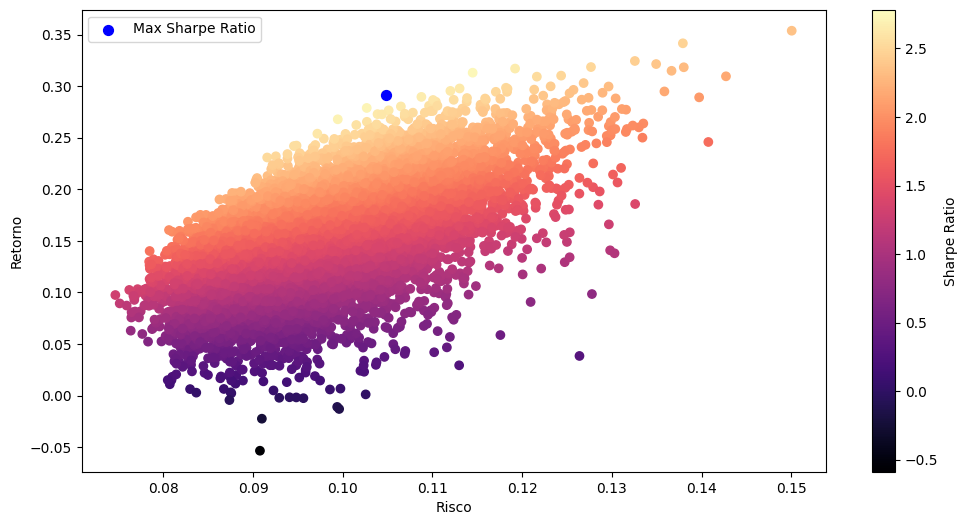

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'magma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret, c = 'blue', s = 50, label = 'Max Sharpe Ratio')
plt.legend()
plt.show()

## Teoria da Média-Variância Para Construir a Fronteira Eficiente

In [32]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(media_retornos * weights) * len(retornos)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * len(retornos), weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [33]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [34]:
def check_sum(weights):
    return np.sum(weights) - 1

## Definindo as Restrições do Problema de Otimização

In [35]:
cons = ({'type': 'eq', 'fun': check_sum})

In [36]:
limite = (0.0, 1.0)

In [37]:
limites = tuple(limite for asset in range(10))

In [38]:
init_guess = [0.1 for i in range(10)]

## Otimização com SLSQP (Sequential Least Squares Programming)

In [39]:
resultado_otimizacao = minimize(neg_sharpe,
                                init_guess,
                                method = 'SLSQP',
                                bounds = limites,
                                constraints = cons)

In [40]:
print(resultado_otimizacao)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.2517903489571167
       x: [ 7.304e-16  0.000e+00  6.856e-16  6.611e-16  2.489e-16
            1.617e-01  2.898e-01  0.000e+00  5.485e-01  0.000e+00]
     nit: 8
     jac: [ 1.021e+00  1.499e+00  2.469e-01  4.231e-02  3.099e-01
           -5.151e-04 -6.299e-04  1.267e+00  4.847e-04  3.125e+00]
    nfev: 90
    njev: 8


## Construção, Plot e Interpretação da Fronteira Eficiente

In [41]:
resultado_otimizacao.x

array([7.30384173e-16, 0.00000000e+00, 6.85567099e-16, 6.61108861e-16,
       2.48933278e-16, 1.61679167e-01, 2.89812848e-01, 0.00000000e+00,
       5.48507985e-01, 0.00000000e+00])

In [42]:
get_ret_vol_sr(resultado_otimizacao.x)

array([0.42414537, 0.13043441, 3.25179035])

In [43]:
frontier_y = np.linspace(0.0, 0.60, num = 200)

In [44]:
def retorna_volatilidade(weights):
    return get_ret_vol_sr(weights)[1]

In [45]:
frontier_x = []

In [46]:
for retorno_possivel in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - retorno_possivel})

    resultado = minimize(retorna_volatilidade,
                         init_guess,
                         method = 'SLSQP',
                         bounds = limites,
                         constraints = cons)

    frontier_x.append(resultado['fun'])

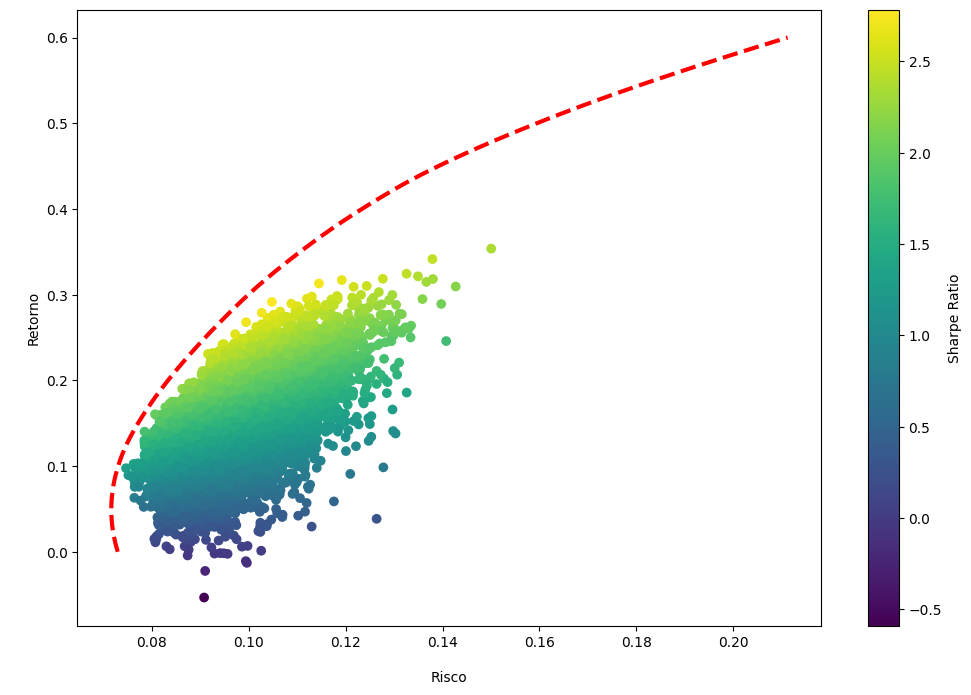

In [47]:
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('\nRisco')
plt.ylabel('\nRetorno')
plt.plot(frontier_x, frontier_y, 'r--', linewidth = 3)
plt.show()

## Definindo os parâmetros

In [64]:
# Números de portifólios
num_portfolios = 10000

In [49]:
# Taxa livre de risco
taxa_livre_risco = 0.015

## Função para Calcular a Performance do Portfólio

In [66]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 62
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(62)
    return std, returns

## Função para Retornar o Negativo do Sharpe Ratio do Portfólio

In [89]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

## Função para Maximizar o Sharpe Ratio do Portfólio

In [87]:
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(
        neg_sharpe_ratio, 
        num_assets * [1./num_assets,],
        args = args,
        method = 'SLSQP',
        bounds = bounds, 
        constraints = constraints
    )
    return result

## Função para Calcular a Volatilidade do Portfólio

In [53]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

## Função para Minimizar a Volatilidade do Portfólio

In [93]:
def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(
        portfolio_volatility,
        num_assets * [1./num_assets,],
        args = args,
        method = 'SLSQP',
        bounds = bounds,
        constraints = constraints
    )
    return result

## Função para Calcular o Retorno Eficiente

In [103]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    
    def portfolio_return(weights):
        return portfolio_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = minimize(
        portfolio_volatility,
        num_assets * [1./num_assets,],
        args = args,
        method = 'SLSQP',
        bounds = bounds,
        constraints = constraints
    )
    return result

## Função para Calcular a Fronteira Eficiente

In [97]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))

    return efficients

## Funções Auxiliares

In [78]:
def prints_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, show_portfolio = True):

    print('-'*80)
    print('Alocação do Portfólio com Índice Sharpe Máximo\n')
    print(f'Retorno Durante Período de 3 Meses: {rp:.3f}')
    print(f'Risco Durante Período de 3 Meses: {sdp:.3f}')
    print('\n')
    print(max_sharpe_allocation)
    print('-'*80)
    print('Alocação de Portfólio com Risco Mínimo\n')
    print(f'Reorno Durante Período de 3 Meses: {rp_min:.3f}')
    print(f'Risco Durante Período de 3 Meses: {sdp:.3f}')
    print('\n')
    print(min_vol_allocation)


    if (show_portfolio == True):
        an_vol = np.std(retornos) * np.sqrt(62)
        an_rt = media_retornos * 62
        print('-'*80)
        print('Rteornos e Riscos de Ativos Individuais\n')
        for i, txt in enumerate(df.columns):
            print(f'{txt}: Retorno Durante Período de 3 Meses {an_rt[i]:.3f}, Risco Durante Período de 3 Meses {an_vol[i]:.3f}')

    print('-'*80)

In [58]:
def plot_stats(results, sdp, rp, sdp_min, rp_min, frontier_flag = True):
    plt.figure(figsize = (12, 7))
    plt.scatter(
        results[0,:],
        results[1,:],
        c = results[2,:],
        cmap = 'YlGnBu',
        marker = 'o',
        s = 10,
        alpha = 0.3
    )
    plt.colorbar()
    plt.scatter(
        sdp,
        rp,
        marker = '*',
        color = 'r',
        s = 500,
        label = 'Sharpe Ratio Máximo'
    )
    plt.scatter(
        sdp_min,
        rp_min,
        marker = '*',
        color = 'g',
        s = 500,
        label = 'Risco Máximo'
    )
    if (frontier_flag == False):
        plt.title('Otimização de Portfólio Simulada com Base na Fronteira Eficiente')
        plt.xlabel('\nRisco Durante Período de 3 Meses')
        plt.ylabel('Retorno Durante Período de 3 Meses')
        plt.legend(labelspacing = 0.8)
        return

    target = np.lispace(rp_min, 0.40, 500)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, taarget)

    plt.plot(
        [p['fun'] for p in efficient_portfolios],
        target,
        linestyle = '-.',
        color = 'black',
        label = 'Fronteira Eficiente'
    )

    plt.title('Otimização de Portfólio Calculada com Base na Fronteira Eficiente')
    plt.xlabel('\nRisco Durante Período de 3 Meses')
    plt.ylabel('Retorno Durante Período de 3 Meses')

    plt.legend(labelspacing = 0.8)

## Função para Gerar Combinações Randômicas dos Portfólios

In [71]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

## Função para Otimização de Portfólio Simulada com Base na Fronteira Eficiente

In [76]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index = df.columns, columns = ['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index = df.columns, columns = ['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 3) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    prints_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)
    plot_stats(results, sdp, rp, sdp_min, rp_min, False)

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.331
Risco Durante Período de 3 Meses: 0.112


Ticker       AAPL    AMD    AMZN  GOOGL   MSFT    NFLX    NVDA   SONY   SPOT  \
allocation  1.218  0.278  21.078  7.054  1.861  29.009  18.351  0.448  20.66   

Ticker       TSLA  
allocation  0.043  
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Reorno Durante Período de 3 Meses: 0.082
Risco Durante Período de 3 Meses: 0.112


Ticker        AAPL    AMD   AMZN  GOOGL    MSFT   NFLX   NVDA    SONY   SPOT  \
allocation  11.457  1.161  7.253  8.873  14.275  8.559  0.924  25.124  15.84   

Ticker       TSLA  
allocation  6.534  
--------------------------------------------------------------------------------
Rteornos e Riscos de Ativos Individuais

AAPL: Retorno Durante Período de 3 Meses -0.077, Risco Dura

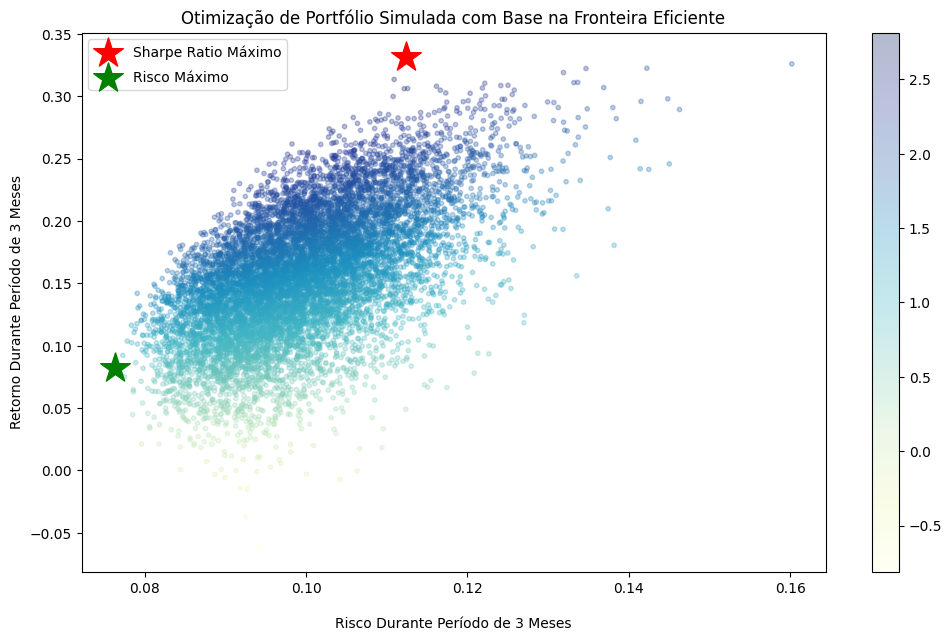

In [79]:
display_simulated_ef_with_random(media_retornos, cov_matrix, num_portfolios, taxa_livre_risco)

## Função para Otimização de Portfólio Calculada com Base na Fronteira Eficiente

In [80]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index = df.columns, columns = ['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x, index = df.columns, columns = ['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 3) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    prints_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)
    plot_stats(results, sdp, rp, sdp_min, rp_min, False)

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.443
Risco Durante Período de 3 Meses: 0.134


Ticker      AAPL  AMD  AMZN  GOOGL  MSFT    NFLX   NVDA  SONY    SPOT  TSLA
allocation   0.0  0.0   0.0    0.0   0.0  15.255  30.25   0.0  54.495   0.0
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Reorno Durante Período de 3 Meses: 0.051
Risco Durante Período de 3 Meses: 0.134


Ticker        AAPL  AMD  AMZN  GOOGL  MSFT   NFLX  NVDA    SONY    SPOT   TSLA
allocation  29.876  0.0   0.0    0.0  23.7  7.437   0.0  22.138  13.824  3.025
--------------------------------------------------------------------------------
Rteornos e Riscos de Ativos Individuais

AAPL: Retorno Durante Período de 3 Meses -0.077, Risco Durante Período de 3 Meses 0.098
AMD: Retorno Durante Período de 3 Meses 0.306, Risco Durante Pe

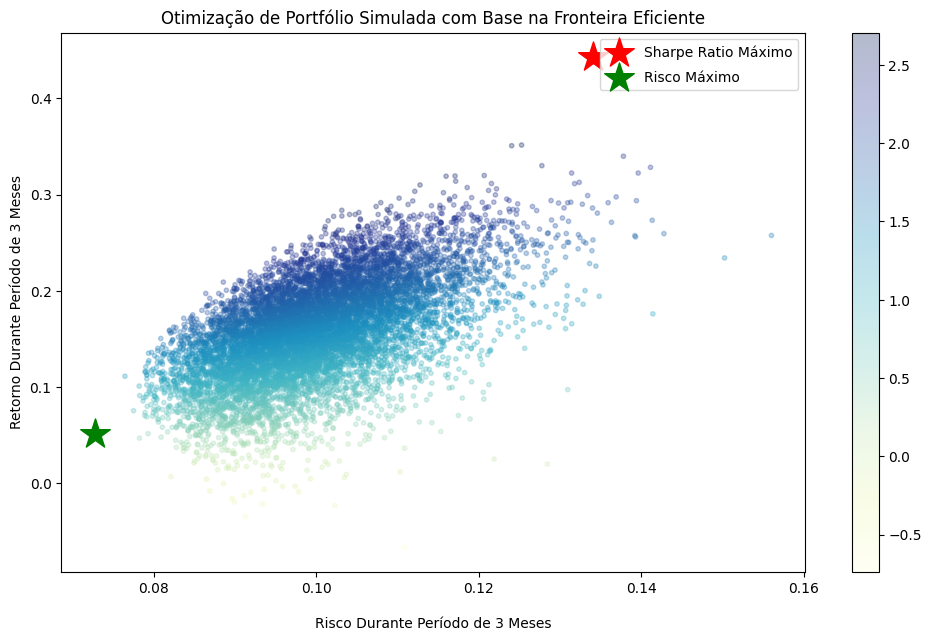

In [94]:
display_calculated_ef_with_random(media_retornos, cov_matrix, num_portfolios, taxa_livre_risco)

## Função para Visualizar a Fronteira Eficiente com a Tangente

In [95]:
def display_ef_with_tangent(mean_returns, cov_matrix, risk_free_rate):
    an_vol = np.std(retornos) * np.sqrt(62)
    an_rt = mean_returns * 62
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index = df.columns, columns = ['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x, index = df.columns, columns = ['allocation'])
    min_vol_allocation.allocation = [round(i*100,3) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    prints_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, True)
    fig, ax = plt.subplots(figsize = (12, 7))
    ax.scatter(an_vol, an_rt, marker = 'o', s = 200)
    for i, txt in enumerate(df.columns):
        ax.annotate(txt, (an_vol[i], an_rt[i]), xytext = (10,0), textcoords = 'offset points')
    ax.scatter(sdp, rp, marker = '*', color = 'r', s = 500, label = 'Sharpe Ratio Máximo')
    ax.scatter(sdp_min, rp_min, marker = '*', color = 'g', s = 500, label = 'Risco Mínimo')
    target = np.linspace(rp_min, 0.60, 500)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], 
            target, 
            linestyle = '-.', 
            color = 'black', 
            label = 'Fonteira Eficiente')
    ax.set_title('Otimização de Portfólio com Ativos Financeiros Individuais')
    ax.set_xlabel('Risco Durante Período de 3 Meses')
    ax.set_ylabel('Retorno Durante Período de 3 Meses')
    ax.legend(labelspacing = 0.8)
    print(round(sdp,3), round(rp,3))
    print(0, risk_free_rate)
    plt.plot([0, round(sdp,4)], 
             [risk_free_rate, round(rp,4)], 
             'k-', 
             linewidth = 2, 
             label = 'Tangente da Fronteira Eficiente')
    plt.legend()
    plt.show()
    d = {}
    for i, txt in enumerate(df.columns):
        d[txt] = [round(an_rt[i],3), round(an_vol[i],3)]
    d['market'] = [round(rp,3), round(sdp,3)]
    return d

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.443
Risco Durante Período de 3 Meses: 0.134


Ticker      AAPL  AMD  AMZN  GOOGL  MSFT    NFLX   NVDA  SONY    SPOT  TSLA
allocation   0.0  0.0   0.0    0.0   0.0  15.255  30.25   0.0  54.495   0.0
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Reorno Durante Período de 3 Meses: 0.051
Risco Durante Período de 3 Meses: 0.134


Ticker        AAPL  AMD  AMZN  GOOGL  MSFT   NFLX  NVDA    SONY    SPOT   TSLA
allocation  29.876  0.0   0.0    0.0  23.7  7.437   0.0  22.138  13.824  3.025
--------------------------------------------------------------------------------
Rteornos e Riscos de Ativos Individuais

AAPL: Retorno Durante Período de 3 Meses -0.077, Risco Durante Período de 3 Meses 0.098
AMD: Retorno Durante Período de 3 Meses 0.306, Risco Durante Pe

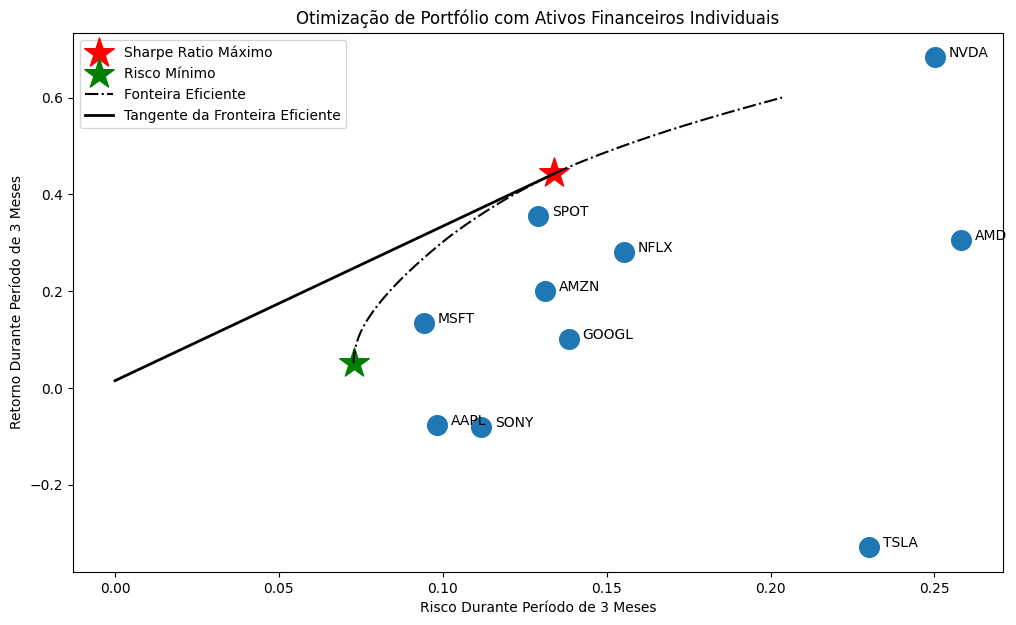

In [104]:
resultados = display_ef_with_tangent(media_retornos, cov_matrix, taxa_livre_risco)

## Calculando a Security Maarket Line

In [105]:
resultados

{'AAPL': [np.float64(-0.077), np.float64(0.098)],
 'AMD': [np.float64(0.306), np.float64(0.258)],
 'AMZN': [np.float64(0.2), np.float64(0.131)],
 'GOOGL': [np.float64(0.101), np.float64(0.138)],
 'MSFT': [np.float64(0.135), np.float64(0.094)],
 'NFLX': [np.float64(0.28), np.float64(0.155)],
 'NVDA': [np.float64(0.683), np.float64(0.25)],
 'SONY': [np.float64(-0.081), np.float64(0.112)],
 'SPOT': [np.float64(0.355), np.float64(0.129)],
 'TSLA': [np.float64(-0.329), np.float64(0.23)],
 'market': [np.float64(0.443), np.float64(0.134)]}

In [107]:
asset1_er = resultados['AMD'][0]
asset1_vol = resultados['AMD'][1]

In [108]:
asset2_er = resultados['AMZN'][0]
asset2_vol = resultados['AMZN'][1]

In [109]:
asset3_er = resultados['NVDA'][0]
asset3_vol = resultados['NVDA'][1]

In [110]:
market_er = resultados['market'][0]
market_vol = resultados['market'][1]

In [112]:
# Define a taxa livre de risco
rf = 0.015

In [113]:
# Market risk premium
mrp = market_er - rf

In [114]:
# Calcula o beta
asset1_beta = (asset1_er - rf) / (market_er - rf)
asset2_beta = (asset2_er - rf) / (market_er - rf)
asset3_beta = (asset3_er - rf) / (market_er - rf)

In [115]:
print(f"Beta do Asset 1: {asset1_beta:.2f}")
print(f"Beta do Asset 2: {asset2_beta:.2f}")
print(f"Beta do Asset 3: {asset3_beta:.2f}")

Beta do Asset 1: 0.68
Beta do Asset 2: 0.43
Beta do Asset 3: 1.56


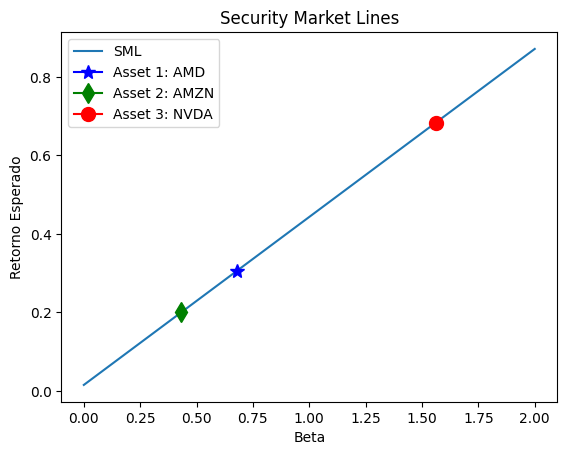

In [116]:
betas = np.linspace(0, 2, 100)

asset1_ers = rf + asset1_beta * (market_er - rf) 
asset2_ers = rf + asset2_beta * (market_er - rf) 
asset3_ers = rf + asset3_beta * (market_er - rf) 

sml = rf + betas * (market_er - rf) 

plt.plot(betas, sml, label = 'SML')
plt.plot(asset1_beta, asset1_ers, color = 'blue', marker = '*', label = 'Asset 1: AMD', markersize = 10)
plt.plot(asset2_beta, asset2_ers, color = 'green', marker = 'd', label = 'Asset 2: AMZN', markersize = 10)
plt.plot(asset3_beta, asset3_ers, color = 'red', marker = 'o', label = 'Asset 3: NVDA', markersize = 10)

plt.xlabel('Beta')
plt.ylabel('Retorno Esperado')
plt.title('Security Market Lines')

plt.legend()

plt.show()